# Doodling with Different Packages

## Seaborn

### Trying multifacet graphs

In [1]:
# THE ONLINE TUTORIAL FROM SEABORN WEBSITE
# https://seaborn.pydata.org/examples/many_facets.html
    
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

In [2]:
df.head(10)

,position,step,walk
0,0,0,0
1,1,1,0
2,1,2,0
3,1,3,0
4,0,4,0
5,0,0,1
6,1,1,1
7,1,2,1
8,2,3,1
9,1,4,1


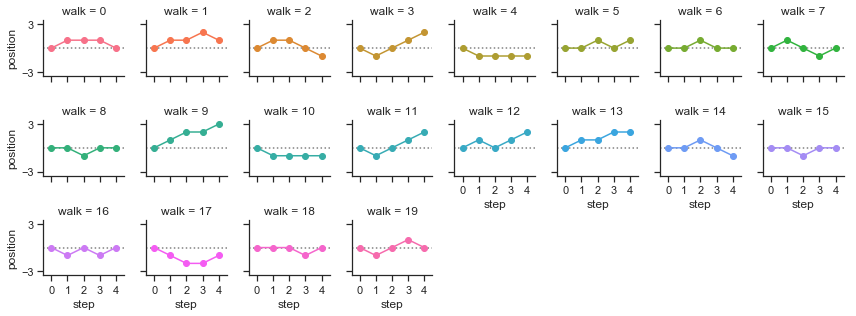

In [3]:
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", col_wrap=8, height=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

plt.show()

## Matplotlib

### Change histogram color

(array([1.6000e+01, 6.6000e+01, 2.3100e+02, 7.2400e+02, 1.8380e+03,
        3.7690e+03, 6.9610e+03, 1.0502e+04, 1.4086e+04, 1.5677e+04,
        1.5233e+04, 1.2456e+04, 8.7170e+03, 5.1590e+03, 2.6940e+03,
        1.2220e+03, 4.6600e+02, 1.3400e+02, 4.1000e+01, 8.0000e+00]),
 array([0.79881469, 1.23010788, 1.66140106, 2.09269424, 2.52398742,
        2.95528061, 3.38657379, 3.81786697, 4.24916016, 4.68045334,
        5.11174652, 5.54303971, 5.97433289, 6.40562607, 6.83691925,
        7.26821244, 7.69950562, 8.1307988 , 8.56209199, 8.99338517,
        9.42467835]),
 <a list of 20 Patch objects>)

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


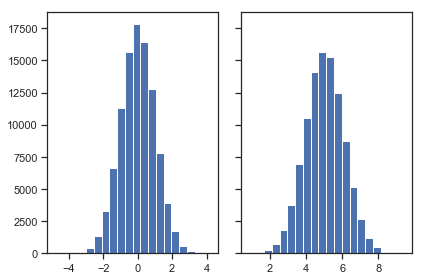

In [4]:
# THE ONLINE TUTORIAL FROM MATPLOTLIB WEBSITE
# https://matplotlib.org/gallery/statistics/hist.html
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

N_points = 100000
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points)
y = .4 * x + np.random.randn(100000) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


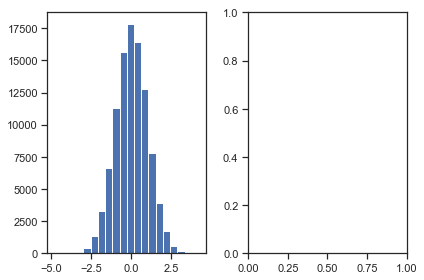

In [5]:
fig, axs = plt.subplots(1, 2, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(x, bins=n_bins)

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


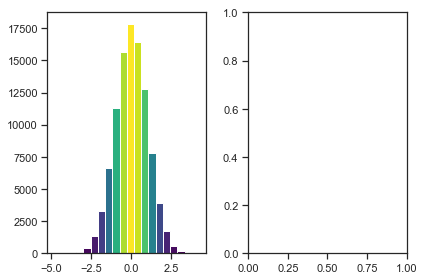

In [6]:
# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

fig

In [7]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

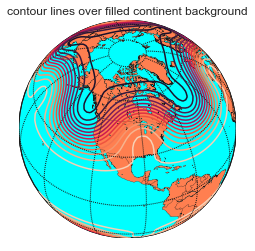

In [8]:
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()

In [11]:
cities = pd.read_csv('../data/list-cities-california-state-us-168j.csv')

# Extract the data we're interested in
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 5: invalid continuation byte

In [4]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

NameError: name 'plt' is not defined

In [12]:
etopo = np.loadtxt('etopo20data.gz')
lons  = np.loadtxt('etopo20lons.gz')
lats  = np.loadtxt('etopo20lats.gz')
# create Basemap instance for Robinson projection.
m = Basemap(projection='robin',lon_0=0.5*(lons[0]+lons[-1]))
# compute map projection coordinates for lat/lon grid.
x, y = m(*np.meshgrid(lons,lats))
# make filled contour plot.
cs = m.contourf(x,y,etopo,30,cmap=plt.cm.jet)
m.drawcoastlines() # draw coastlines
m.drawmapboundary() # draw a line around the map region
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0]) # draw parallels
m.drawmeridians(np.arange(0.,420.,60.),labels=[0,0,0,1]) # draw meridians
plt.title('Robinson Projection') # add a title
plt.show()

OSError: etopo20data.gz not found.

## Doodling of Interactive Graph

In [5]:
import datetime
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.plotly as py


In [6]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/yankev/testing/master/datasets/nycflights.csv')
df = df.drop(df.columns[[0]], axis=1)